In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data = pd.read_csv('/content/hungry_laptimes.csv')

In [ ]:
def lap_time_converter(time_str):
    time_components = time_str.split(':')
    total_seconds = float(time_components[0]) * 60 + float(time_components[1])
    if len(time_components) == 3:
        total_seconds += float(time_components[2]) / 1000
    return total_seconds


In [ ]:
data['Time'] = data['Time'].apply(lap_time_converter)

# Display the updated DataFrame with lap times in seconds
print(data)


    Lap     Time
0     1   79.756
1     2   78.943
2     3  131.800
3     4   78.746
4     5   83.750
5     6   83.607
6     7   83.065
7     8   83.832
8     9   83.892
9    10   84.625
10   11   84.263
11   12   83.972
12   13   84.219
13   14   88.007
14   15   84.232


In [ ]:
X = data['Time'].values.reshape(-1, 1)
y = data ['Lap'].values.reshape(-1,1)



In [ ]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
y_pred = model.predict(X)

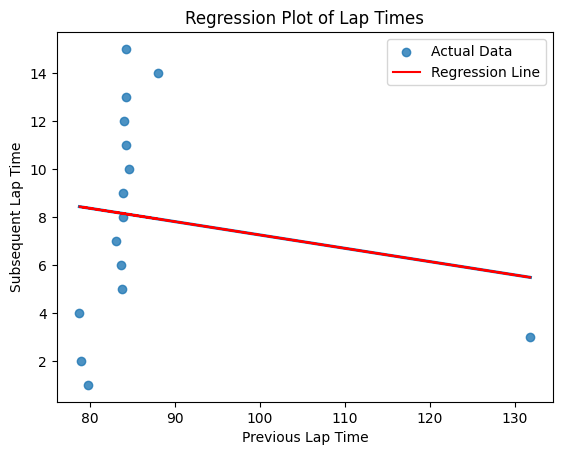

In [ ]:
import matplotlib.pyplot as plt
sns.regplot(x=X.flatten(), y=y.flatten(), ci=None, label='Actual Data')
plt.plot(X.flatten(), y_pred.flatten(), color='red', label='Regression Line')
plt.xlabel('Previous Lap Time')
plt.ylabel('Subsequent Lap Time')
plt.title('Regression Plot of Lap Times')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the lap times with some outliers
lap_times = data['Time'].values

# Create a DataFrame from the lap times


# Fit the regression model
X = data['Lap'].values.reshape(-1, 1)
y = data['Time'].values
model = LinearRegression()
model.fit(X, y)

# Make predictions for lap times from lap 16 to lap 20
for lap in range(16, 21):
    lap_data = np.array([[lap]])  # Reshape the lap value for prediction
    predicted_time = model.predict(lap_data)
    predicted_time_scalar = predicted_time.item()  # Convert predicted_time to a scalar value

    # Convert predicted_time_scalar to lap time format (mm:ss.mmm)
    minutes = int(predicted_time_scalar // 60)
    seconds = int(predicted_time_scalar % 60)
    milliseconds = int((predicted_time_scalar - int(predicted_time_scalar)) * 1000)
    lap_time = "{:02d}:{:02d}.{:03d}".format(minutes, seconds, milliseconds)

    print("Predicted lap time for lap", lap, ":", lap_time.zfill(9))


Predicted lap time for lap 16 : 01:22.822
Predicted lap time for lap 17 : 01:22.368
Predicted lap time for lap 18 : 01:21.915
Predicted lap time for lap 19 : 01:21.462
Predicted lap time for lap 20 : 01:21.009
